In [1]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 65.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
import seaborn as sns
import math
sns.set(font_scale=1.2)
from sklearn.model_selection import KFold, cross_val_score
#S = 1
S = (4500000)/4/(2**23-1) #uV/count

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Common Average Referencing  of EEG_data of each session in each subject
def common_avg_ref(eeg_data):
  print(type(eeg_data[0][2]))
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  model = scaler.fit(eeg_data)
  eeg_data = model.transform(eeg_data)
  print(type(eeg_data[0][2]))
  return eeg_data

In [61]:
# Read data

def read_raw_data(subject):
    df_1 = pd.read_csv(subject + 'data_1/trials.txt', header=4)
    events_df_1 = pd.read_csv(subject + 'data_1/events.txt', header=None)

    df_2 = pd.read_csv(subject + 'data_2/trials.txt', header=4)
    events_df_2 = pd.read_csv(subject + 'data_2/events.txt', header=None)
   
    df_1 = df_1[[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7', ' Timestamp']]

    df_2 = df_2[[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7', ' Timestamp']]
 
    
    df_1 = df_1.rename(columns={" EXG Channel 0":"Fp1", " EXG Channel 1":"Fp2", " EXG Channel 2":"C3", " EXG Channel 3":"C4", " EXG Channel 4":"P3", " EXG Channel 5":"P4", " EXG Channel 6":"O1", " EXG Channel 7":"O2"})
    df_2 = df_2.rename(columns={" EXG Channel 0":"Fp1", " EXG Channel 1":"Fp2", " EXG Channel 2":"C3", " EXG Channel 3":"C4", " EXG Channel 4":"P3", " EXG Channel 5":"P4", " EXG Channel 6":"O1", " EXG Channel 7":"O2"})

    
    events_1 = events_df_1.to_numpy()
    events_2 = events_df_2.to_numpy()
    
    data_1 = df_1.to_numpy()
    data_2 = df_2.to_numpy()
  
    
    eeg_data_1 = data_1[:,:8]
    eeg_data_2 = data_2[:,:8]
  
  #  eeg_data_1 = common_avg_ref(eeg_data_1)
  #  eeg_data_2 = common_avg_ref(eeg_data_2)
  #  eeg_data_3 = common_avg_ref(eeg_data_3)

    time_stamp_1 = data_1[:, 8]
    time_stamp_2 = data_2[:, 8]
  
    
    return eeg_data_1, events_1, time_stamp_1, eeg_data_2, events_2, time_stamp_2

In [64]:
# Subject 1, three trial data
sub_1_eeg_data_1, sub_1_events_1, sub_1_time_stamp_1, sub_1_eeg_data_2, sub_1_events_2, sub_1_time_stamp_2 = read_raw_data('/content/drive/MyDrive/BTP-MTP/Anushka/tri_color_data/subject_1/')

In [ ]:
# Subject 1, three trial data
sub_1_eeg_data_1, sub_1_events_1, sub_1_time_stamp_1, sub_1_eeg_data_2, sub_1_events_2, sub_1_time_stamp_2 = read_raw_data('/content/drive/MyDrive/BTP-MTP/Anushka/tri_color_data/subject_2/')

In [69]:
# Check the dimentions of the data

print(sub_1_eeg_data_1.shape)
print(sub_1_events_1.shape)
print(sub_1_time_stamp_1.shape)


print(sub_1_eeg_data_2.shape)
print(sub_1_events_2.shape)
print(sub_1_time_stamp_2.shape)
print('-----------------------')
#print(sub_2_eeg_data_1.shape)
#print(sub_2_events_1.shape)
#print(sub_2_time_stamp_1.shape)

(185711, 8)
(155, 2)
(185711,)
(194248, 8)
(155, 2)
(194248,)
-----------------------


In [70]:
# Plot raw data

def plot_raw(data, i):
    plt.figure(figsize=(5, 3))
    plt.plot(data[2000:2500, i])
    plt.title('Graph of Raw Data for Channel: ' + str(i+1))
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

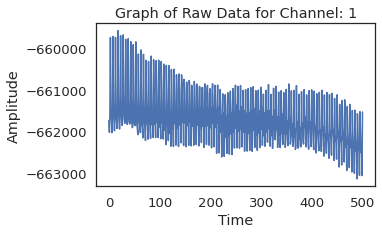

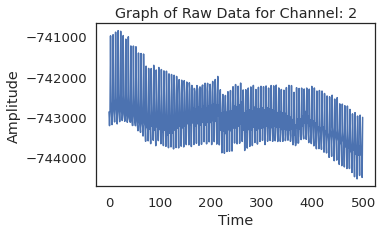

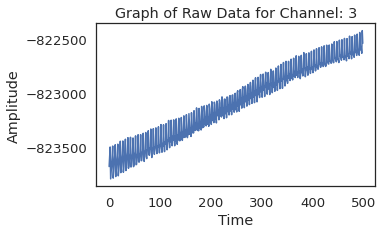

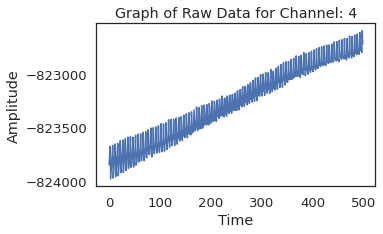

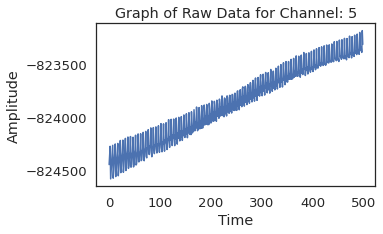

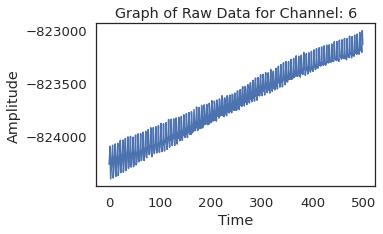

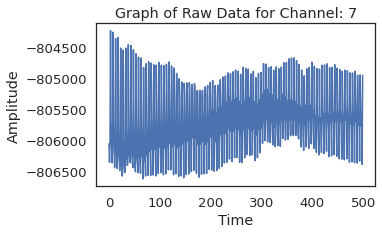

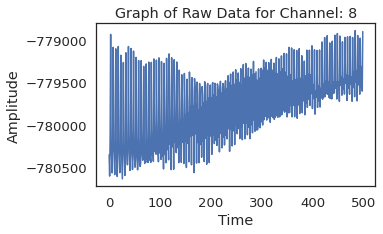

In [71]:
for i in range(8):
    plot_raw(sub_1_eeg_data_2, i)

In [72]:
from scipy import signal

# Define window length (4 seconds)
sf = 256
win = 4 * sf

def plot_psd(data, i):
    freqs, psd = signal.welch(data[:, i], sf, nperseg=win)
    # Plot the power spectrum
    sns.set(font_scale=1.2, style='white')
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, psd, color='k', lw=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram")
    plt.xlim([0, freqs.max()])
    sns.despine()

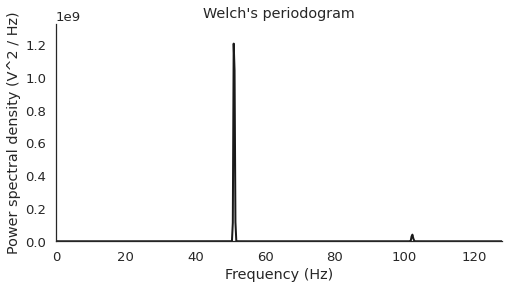

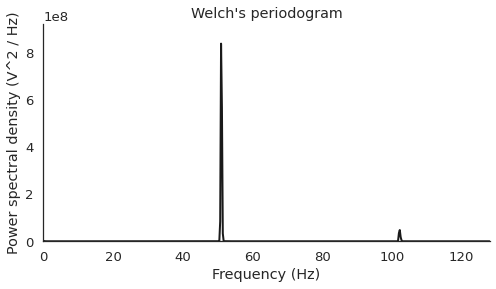

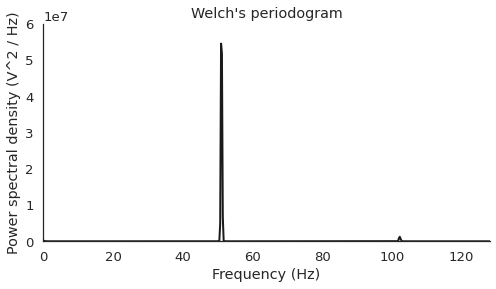

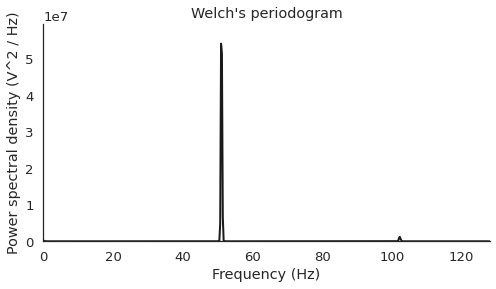

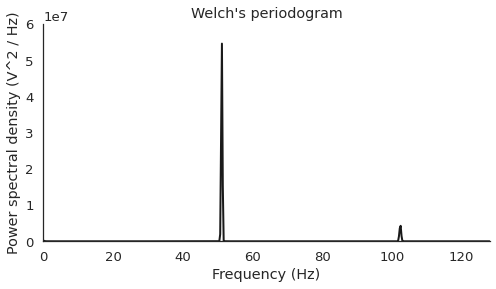

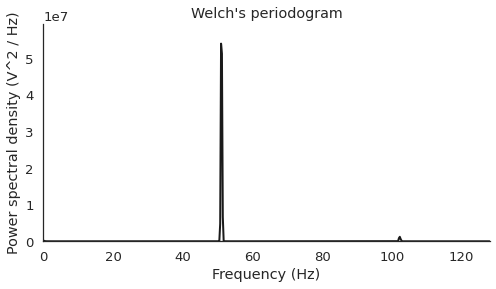

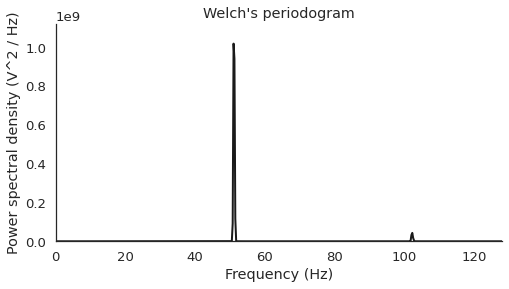

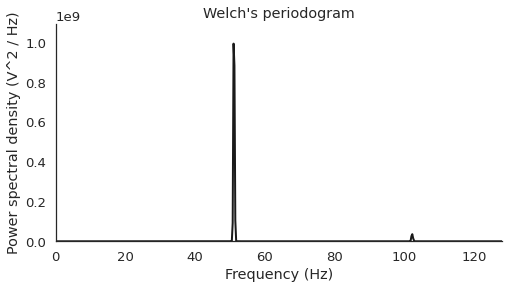

In [74]:
for i in range(8):
    plot_psd(sub_1_eeg_data_2, i)

In [76]:
# Scaling Data with the scale factor S = (4500000)/4/(2**23-1)

sub_1_scaled_data_2 = sub_1_eeg_data_2*S


#sub_2_scaled_data_2 = sub_2_eeg_data_2*S

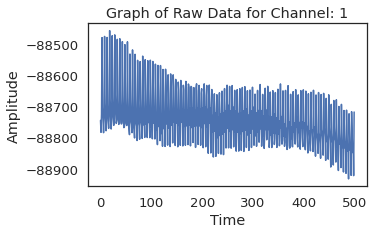

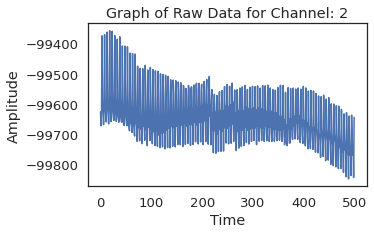

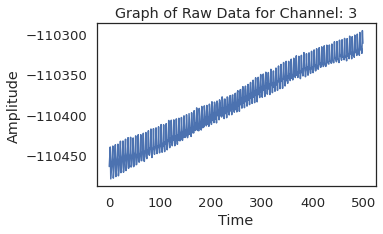

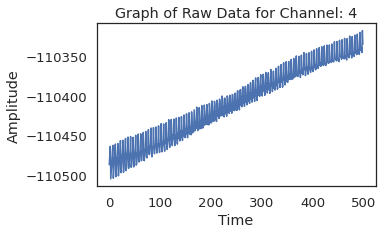

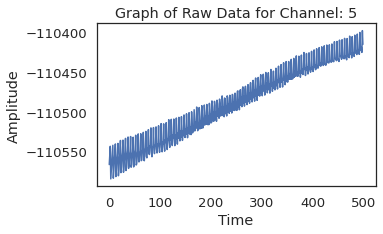

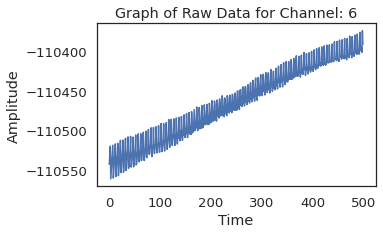

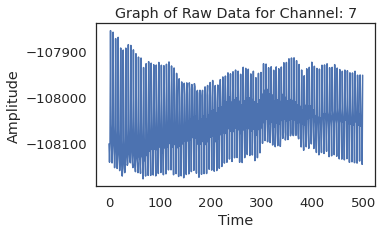

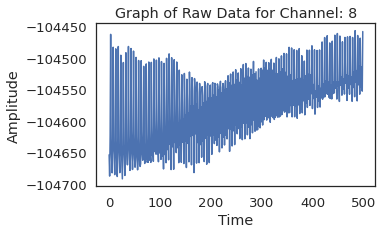

In [77]:
for i in range(8):
    plot_raw(sub_1_scaled_data_2, i)

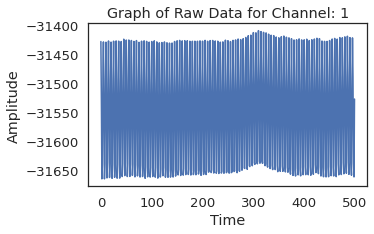

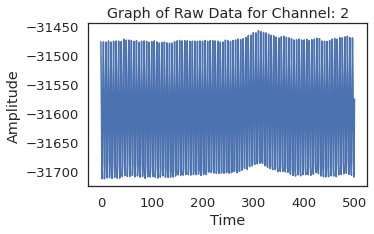

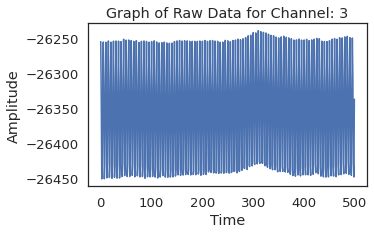

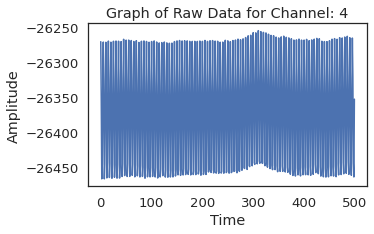

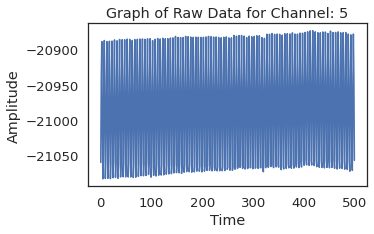

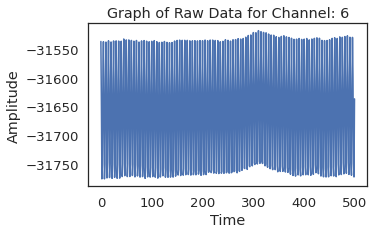

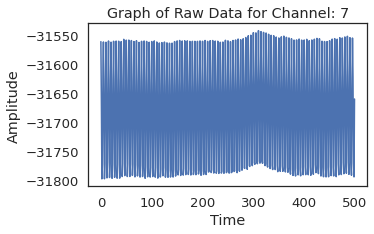

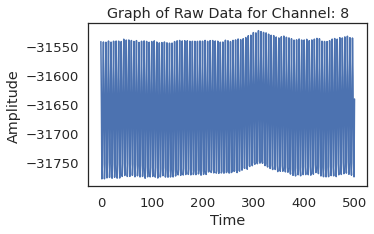

In [15]:
for i in range(8):
    plot_raw(sub_2_scaled_data_1, i)

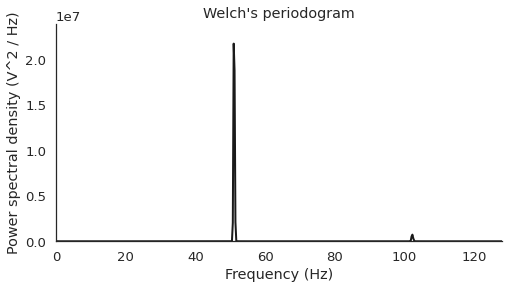

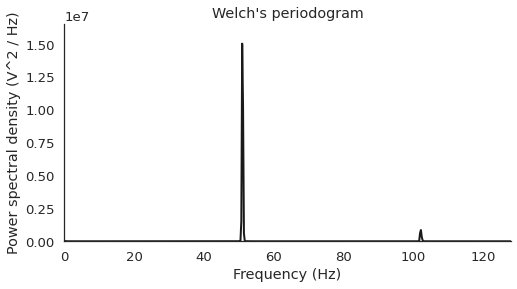

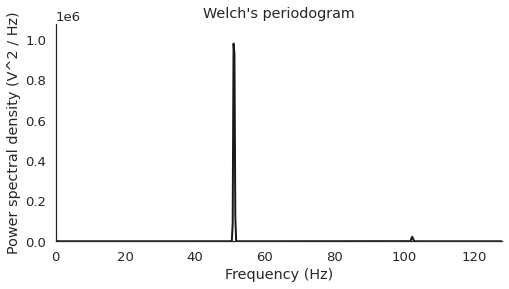

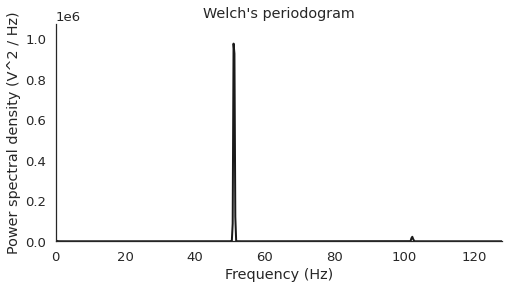

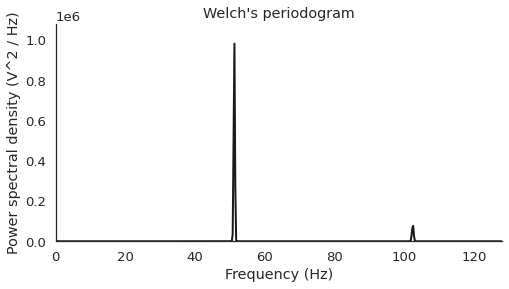

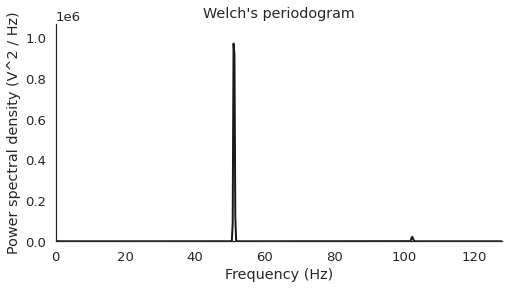

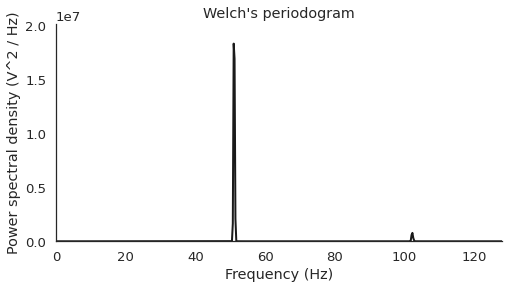

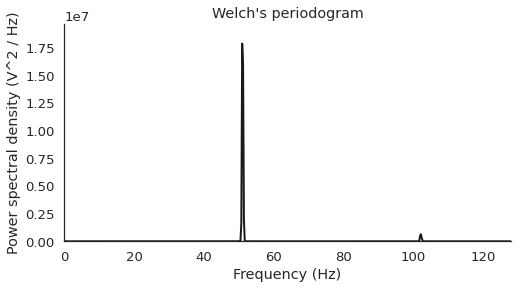

In [78]:
for i in range(8):
    plot_psd(sub_1_scaled_data_2, i)

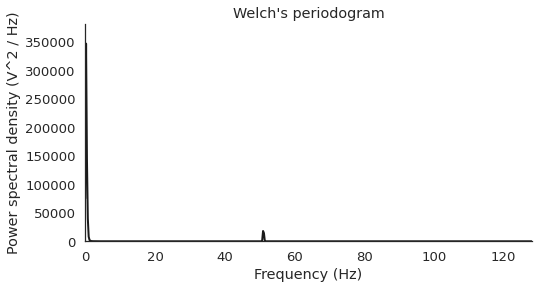

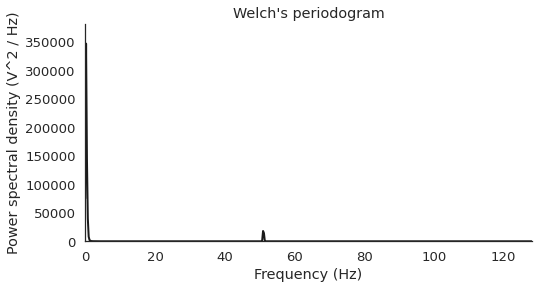

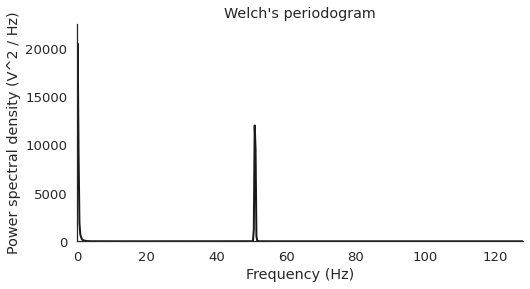

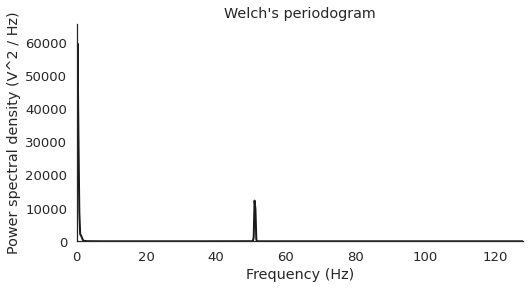

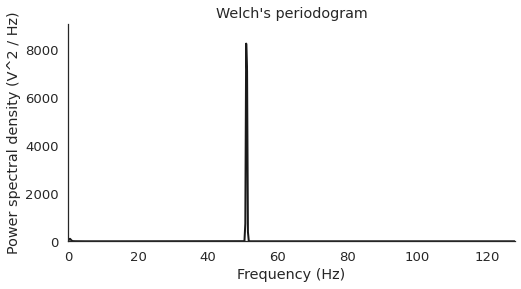

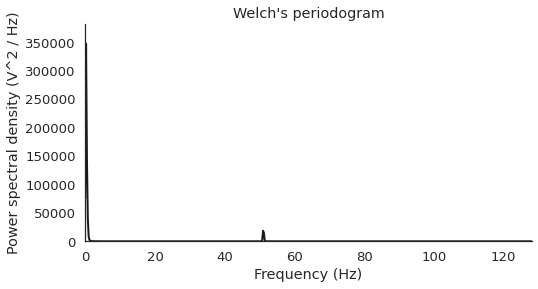

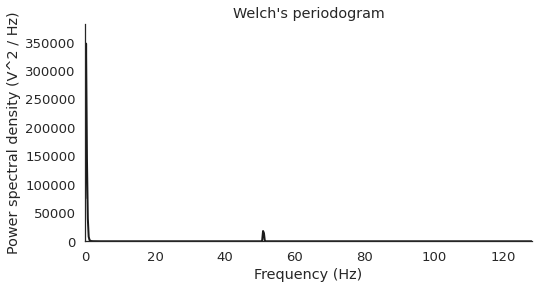

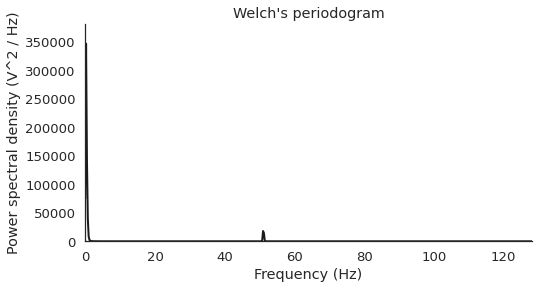

In [17]:
for i in range(8): 
    plot_psd(sub_2_scaled_data_2, i)

In [79]:
# Notch filter

def notch_filter(data,samp_freq=256,notch_freq=50,quality_factor=20):
    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
    freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
    outputSignal = signal.filtfilt(b_notch, a_notch, data)
    return outputSignal


def data_on_notch_filter(data):
    notched_data = np.zeros((8,data.shape[0]))

    for i,channel in enumerate(data.T):
        notched_data[i] = notch_filter(data.T[i],256,50,20)

    return notched_data.T

In [81]:
# Applying notch filter

notched_sub_1_data_1 = data_on_notch_filter(sub_1_scaled_data_1)
notched_sub_1_data_2 = data_on_notch_filter(sub_1_scaled_data_2)


notched_sub_2_data_1 = data_on_notch_filter(sub_2_scaled_data_1)


print(notched_sub_1_data_1.shape)

print('------------------')
print(notched_sub_2_data_1.shape)


(185711, 8)
------------------
(167895, 8)


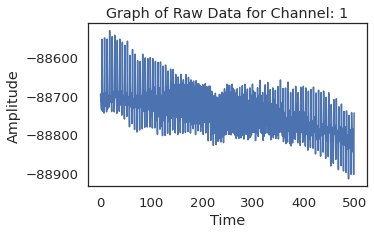

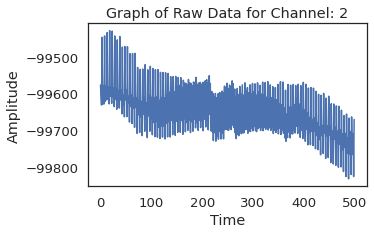

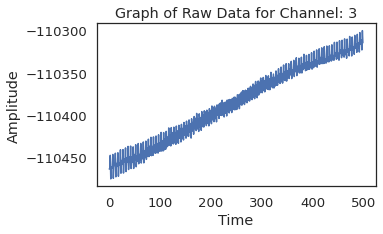

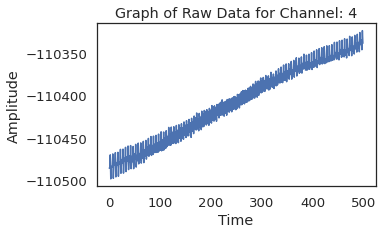

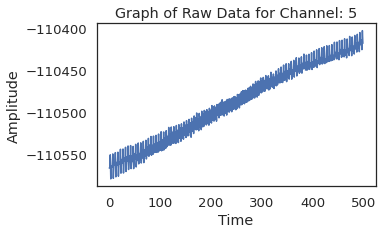

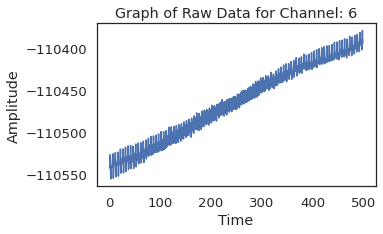

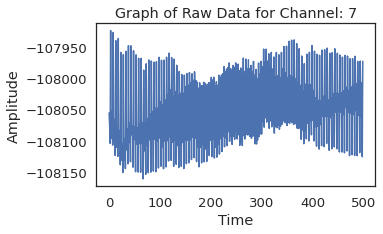

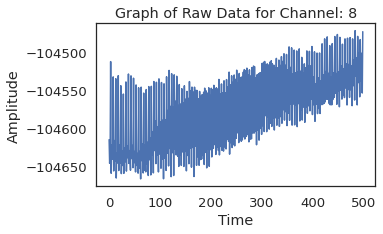

In [82]:
for i in range(8): 
    plot_raw(notched_sub_1_data_2, i)

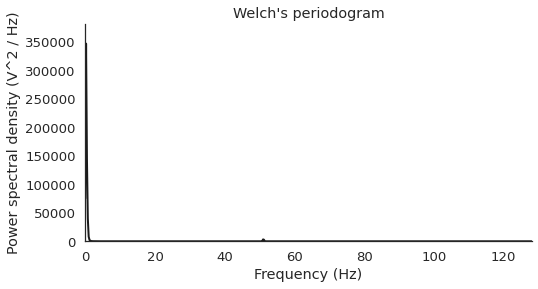

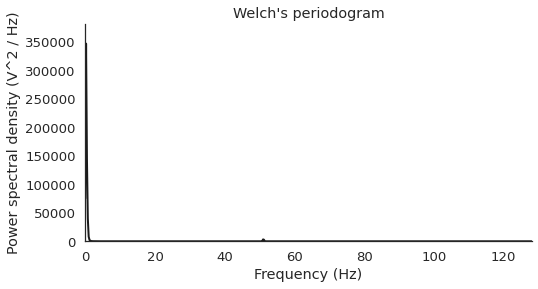

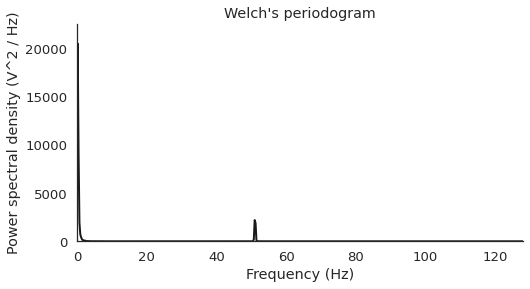

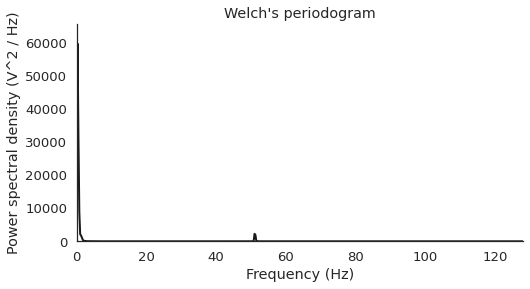

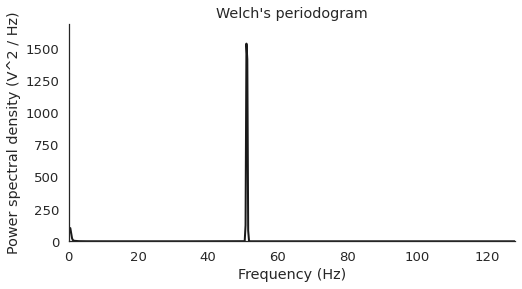

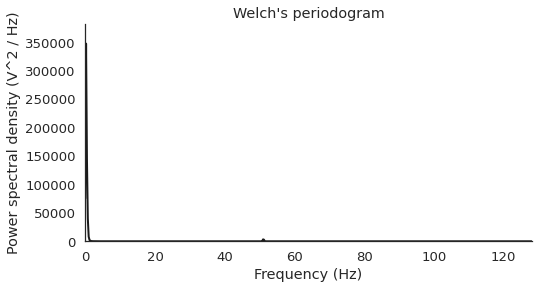

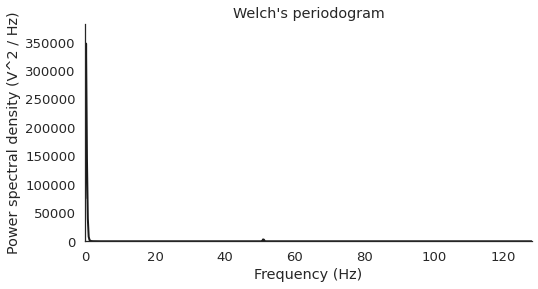

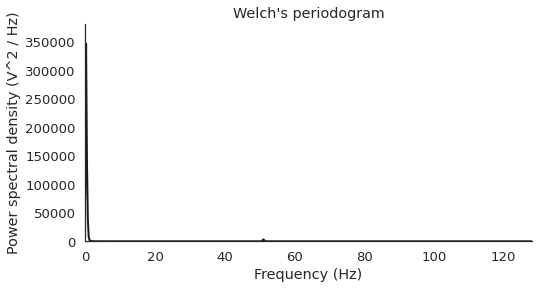

In [21]:
for i in range(8):
    plot_psd(notched_sub_2_data_1, i)

In [83]:
# Bandpass filter

from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

def data_on_bandpass_filter(data):   
    data_preprocessed_1 = np.zeros((8,data.shape[0]))
    for i,channel in enumerate(data.T):
        data_preprocessed_1[i] = butter_bandpass_filter(data.T[i], 0.5,40,256, order=6)

    return data_preprocessed_1.T

In [84]:
# Applying bandpass filter

band_sub_1_data_1 = data_on_bandpass_filter(notched_sub_1_data_1)
band_sub_1_data_2 = data_on_bandpass_filter(notched_sub_1_data_2)

band_sub_2_data_1 = data_on_bandpass_filter(notched_sub_2_data_1)


print(band_sub_1_data_1.shape)

print('------------------')
print(band_sub_2_data_1.shape)


(185711, 8)
------------------
(167895, 8)


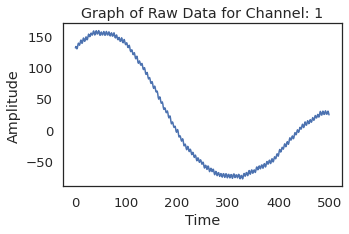

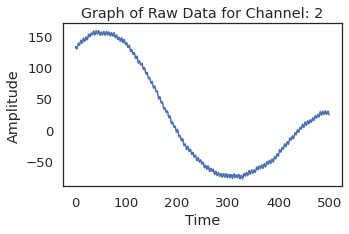

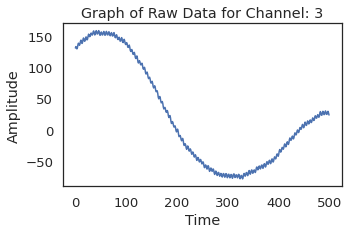

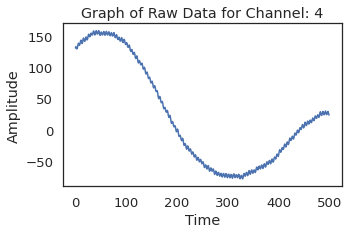

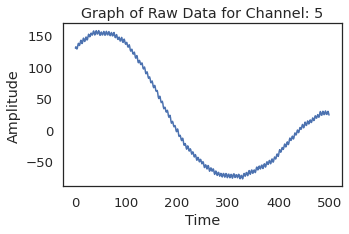

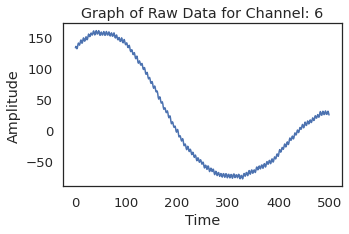

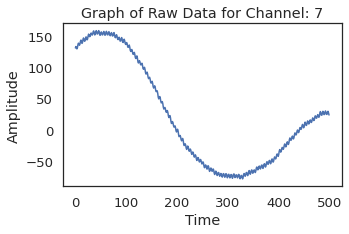

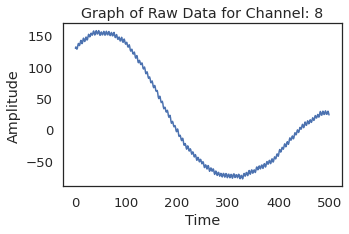

In [85]:
for i in range(8):
    plot_raw(band_sub_1_data_1, i)

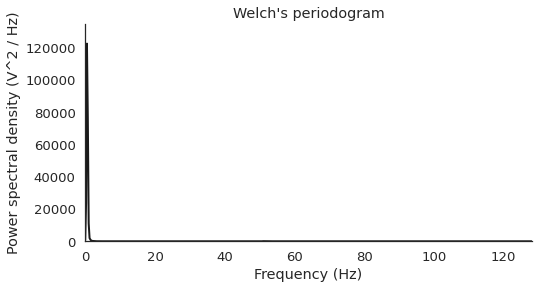

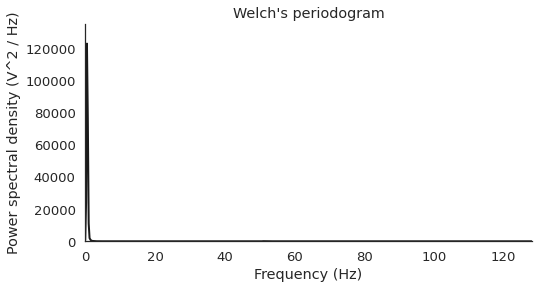

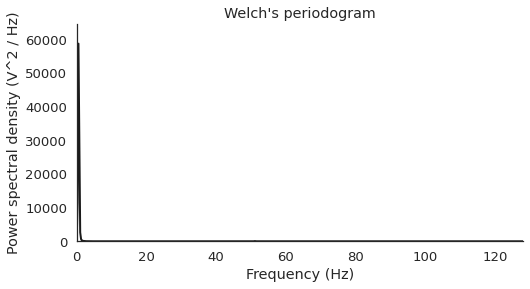

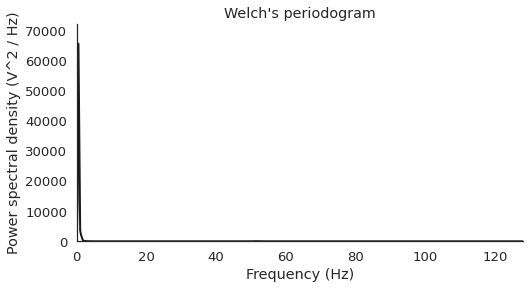

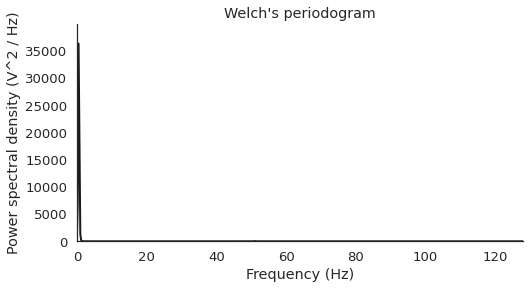

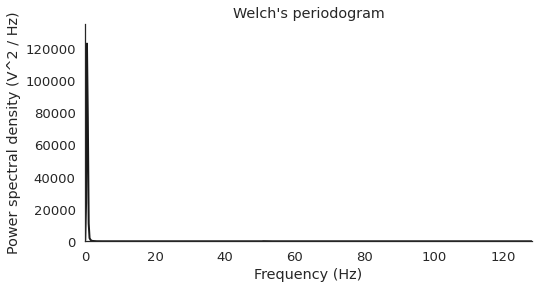

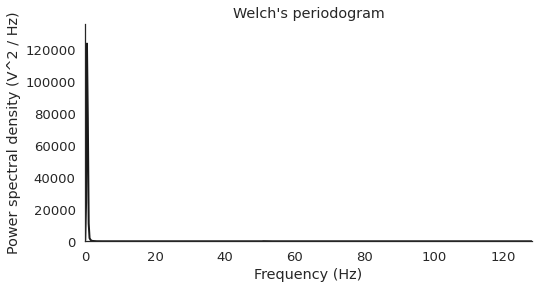

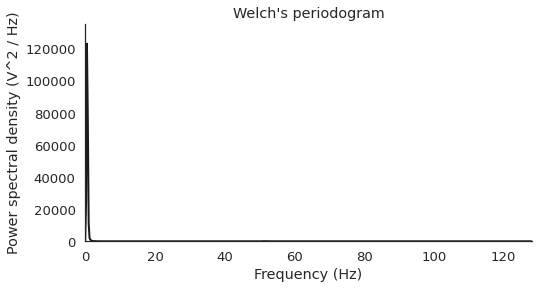

In [25]:
for i in range(8):
    plot_psd(band_sub_2_data_1, i)

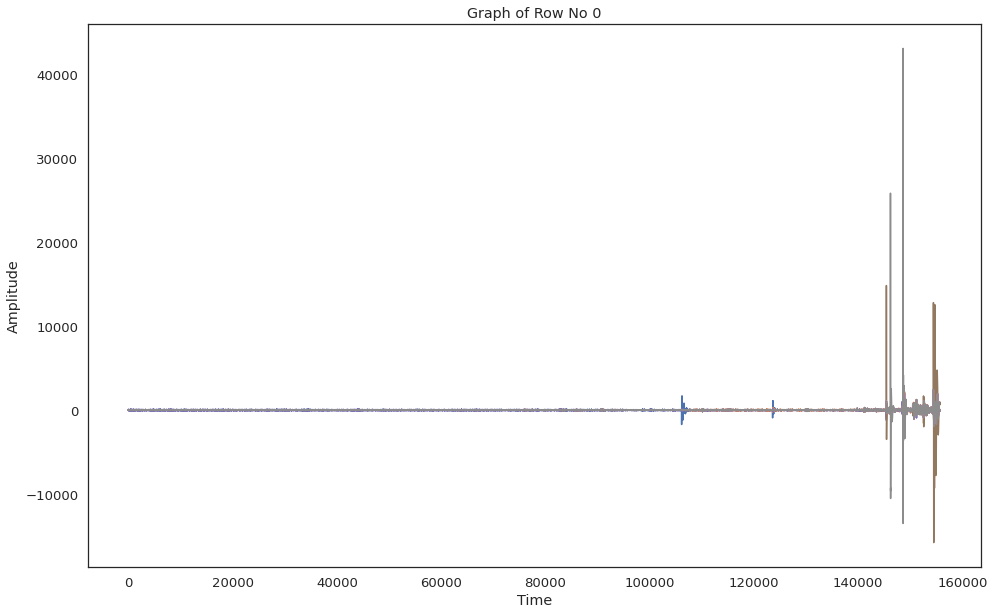

In [26]:
plt.figure(figsize=(16, 10))
plt.plot(band_sub_1_data_1[30000:, :])
plt.title('Graph of Row No 0')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [27]:
def find_closest(arr, val):
    idx = np.abs(arr - val).argmin()
    return (arr[idx] , idx)

#closest stamps for our dataset
def closest_stamp_values(time_stamps, events):
    closest_stamps_vals = np.zeros(len(events))
    closest_stamps_ids = np.zeros(len(events)) 
    
    event_labels = []
    
    for i in range(len(events)):
        closest_stamps_vals[i] = find_closest(time_stamps, events[i,0])[0]
        closest_stamps_ids[i] = find_closest(time_stamps, events[i,0])[1]
        event_labels.append(events[i,1])
    
    return closest_stamps_vals, closest_stamps_ids, event_labels

def remove_fixation_and_baseline(closest_stamps_ids, event_labels, data):
    session_data =  np.random.randint(100000,900000,(375,250,8))
    rc = 0 # row count 
    markers = []
    for i,image in enumerate(closest_stamps_ids):
        if event_labels[i] == 'red' or event_labels[i] == 'green' or event_labels[i] == 'blue':
            for j in range(5):
                if event_labels[i] == 'red':
                    markers.append(0)
                if event_labels[i] == 'green':
                    markers.append(1)
                if event_labels[i] == 'blue':
                    markers.append(2)
                for k in range(250):
                    if int(closest_stamps_ids[i])+j*256+250 > data.shape[0]:
                        break
                    session_data[rc][k] = data[int(closest_stamps_ids[i])+j*256:int(closest_stamps_ids[i])+j*256+250][k]
                rc = rc + 1            
    rc = 0
    return markers,session_data

In [28]:
# Data Epoching

def segmentation(time_stamp, events, data):
    closest_stamps_vals = np.zeros(len(events))
    closest_stamps_ids = np.zeros(len(events))

    event_labels = []

    closest_stamps_vals, closest_stamps_ids, event_labels = closest_stamp_values(time_stamp, events)

    markers, epoched_data = remove_fixation_and_baseline(closest_stamps_ids,event_labels, data)
    markers = np.array(markers)
    
    return epoched_data, markers

In [29]:
sub_1_eeg_data_1.shape

(185711, 8)

In [30]:
 count = 0
 for s in sub_1_events_1:
    if s[1] == 'red' or s[1]== 'blue' or s[1] == 'green':
        count+=1

 print(count)       

75


In [86]:
# Epoching Data for 2 subjects

# Subject 1
epoched_sub_1_data_1, markers_sub_1_data_1 = segmentation(sub_1_time_stamp_1, sub_1_events_1, sub_1_eeg_data_1)
epoched_sub_1_data_2, markers_sub_1_data_2 = segmentation(sub_1_time_stamp_2, sub_1_events_2, sub_1_eeg_data_2)


# Subject 2
epoched_sub_2_data_1, markers_sub_2_data_1 = segmentation(sub_2_time_stamp_1, sub_2_events_1, sub_2_eeg_data_1)


# printing Data Shapes
print(epoched_sub_1_data_1.shape)
print(markers_sub_1_data_1.shape)
#...................................................
print(epoched_sub_1_data_2.shape)
print(markers_sub_1_data_2.shape)

print('----------------')
print(epoched_sub_2_data_1.shape)
print(markers_sub_2_data_1.shape)

(375, 250, 8)
(375,)
(375, 250, 8)
(375,)
----------------
(375, 250, 8)
(375,)


In [32]:
from scipy.stats import kurtosis, skew

def stat_feature(segment):
    _mean = []
    _std = []
    _skewness = []
    _kurtosis = []

    for i in range(len(segment)):
        _mean.append(np.mean(segment[i]))
        _std.append(np.std(segment[i]))
        _skewness.append(skew(segment[i]))
        _kurtosis.append(kurtosis(segment[i]))

    _mean = np.array(_mean)
    _std = np.array(_std)
    _skewness = np.array(_skewness)
    _kurtosis = np.array(_kurtosis)

    features = np.concatenate((_mean, _std, _skewness, _kurtosis))

    return features

In [33]:
from scipy.fftpack import dct

def dct_feature(segment):
    features = []
    for i in range(len(segment)):
        dct_coef = dct(segment[i,:], 2, norm='ortho')
        power = sum( j*j for j in dct_coef)
        features.append(power)

    features = np.array(features)
    return features

In [34]:
from pywt import dwt

def wavelet_features(segment):
    cA_values = []
    cD_values = []
    cA_mean = []
    cA_std = []
    cA_Energy =[]
    cD_mean = []
    cD_std = []
    cD_Energy = []
    Entropy_D = []
    Entropy_A = []
    features = []
    for i in range(len(segment)):
        cA, cD = dwt(segment[i,:],'coif1')
        cA_values.append(cA)
        cD_values.append(cD)		#calculating the coefficients of wavelet transform.
    for x in range(len(segment)):   
        cA_Energy.append(abs(np.sum(np.square(cA_values[x]))))
        features.append(abs(np.sum(np.square(cA_values[x]))))
        
    for x in range(len(segment)):      
        cD_Energy.append(abs(np.sum(np.square(cD_values[x]))))
        features.append(abs(np.sum(np.square(cD_values[x]))))
        
    features = np.array(features)
        
    return features

In [35]:
from scipy.signal import welch

def bandpowers(segment):
    features = []
    for i in range(len(segment)):
        f,Psd = welch(segment[i,:], 100, nperseg=250)
        power1 = 0
        power2 = 0
        power3 = 0
        power4 = 0
        power5 = 0
        for j in range(0,len(f)):
            if(f[j]>= 0.5 and f[j]<=4):
                power1 += Psd[j]
            if(f[j]>4 and f[j]<=8):
                power2 += Psd[j]
            if(f[j]>8 and f[j]<=12):
                power3 += Psd[j]
            if(f[j]>12 and f[j]<=30):
                power4 += Psd[j]
            if(f[j]>30):
                power5 += Psd[j]
        features.append(power1)
        features.append(power2)
        features.append(power3)
        features.append(power4)
        features.append(power5)
    return features

In [36]:
#feature coff_var
def coeff_var(a):
    b = a #Extracting the data from the 32 channels
    output = np.zeros(len(b)) #Initializing the output array with zeros
    k = 0; #For counting the current row no.
    for i in b:
        mean_i = np.mean(i) #Saving the mean of array i
        std_i = np.std(i) #Saving the standard deviation of array i
        output[k] = std_i/mean_i #computing coefficient of variation
        k=k+1
    return output

In [37]:
def fractal_dimension(Z, threshold=0.9):
   # fractal dimension for each channel
    features = []  
    for r in Z:
     # Only for 2d image
      z = np.reshape(r,(250,1))
      assert(len(z.shape) == 2)

      # From https://github.com/rougier/numpy-100 (#87)
      def boxcount(z, k):
        S = np.add.reduceat(z, np.arange(0, z.shape[0], k), axis=0)

        # We count non-empty (0) and non-full boxes (k)
        return len(np.where((S > 0) & (S < k))[0])


      # Transform z into a binary array
      z = (z < threshold)
      # Minimal dimension of image
      p = min(z.shape)
      # Greatest power of 2 less than or equal to p
      n = 2**np.floor(np.log(p)/np.log(2))
      # Extract the exponent
      n = int(np.log(n)/np.log(2))
      print(n)
      # Build successive box sizes (from 2**n down to 2**1)
      sizes = 2**np.arange(n, 1, -1)
      # Actual box counting with decreasing size
      counts = []
      for size in sizes:
        counts.append(boxcount(z, size))

      # Fit the successive log(sizes) with log (counts)
     # coeffs = np.polyfit([1,2,3], [8,9,10], 1)
     # features.append(-coeffs[0])
    return features

In [89]:
segment = epoched_sub_1_data_2[5]
segment = np.array(segment)
segment = np.transpose(segment)
print(segment.shape)
fractal_dimension(segment)
#print(t)

(8, 250)
0
0
0
0
0
0
0
0


[]

In [39]:
def secDiffMean(a):
    b = a # Extracting the data of the 8 channels
    output = np.zeros(len(b)) # Initializing the output array with zeros (length = 8)
    temp1 = np.zeros(len(b[0])-1) # To store the 1st Diffs
    k = 0; # For counting the current row no.
    for i in b:
        t = 0.0
        for j in range(len(i)-1):
            temp1[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
        for j in range(len(i)-2):
            t += abs(temp1[j+1]-temp1[j]) # Summing the 2nd Diffs
        output[k] = t/(len(i)-2) # Calculating the mean of the 2nd Diffs
        k +=1 # Updating the current row no.
    return output

In [40]:
def secDiffMax(a):
    b = a # Extracting the data from the 8 channels
    output = np.zeros(len(b)) # Initializing the output array with zeros (length = 8)
    temp1 = np.zeros(len(b[0])-1) # To store the 1st Diffs
    k = 0; # For counting the current row no.
    t = 0.0
    for i in b:
        for j in range(len(i)-1):
            temp1[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
        t = temp1[1] - temp1[0]
        for j in range(len(i)-2):
            if abs(temp1[j+1]-temp1[j]) > t :
                t = temp1[j+1]-temp1[j] # Comparing current Diff with the last updated Diff Max

        output[k] = t # Storing the 2nd Diff Max for channel k
        k +=1 # Updating the current row no.
    return output

In [41]:
def first_diff_mean(arr):
    data = arr 
    diff_mean_array = np.zeros(len(data)) #Initialinling the array as all 0s
    index = 0; #current cell position in the output array
   
    for i in data:
        sum=0.0#initializing the sum at the start of each iteration
        for j in range(len(i)-1):
            sum += abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
           
        diff_mean_array[index]=sum/(len(i)-1)
        index+=1 #updating the cell position
    return diff_mean_array

In [42]:
def first_diff_max(arr):
    data = arr 
    diff_max_array = np.zeros(len(data)) #Initialinling the array as all 0s
    first_diff = np.zeros(len(data[0])-1)#Initialinling the array as all 0s 
    index = 0; #current cell position in the output array
   
    for i in data:
        max=0.0#initializing at the start of each iteration
        for j in range(len(i)-1):
            first_diff[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
            if first_diff[j]>max: 
                max=first_diff[j] # finding the maximum of the first differences
        diff_max_array[index]=max
        index+=1 #updating the cell position
    return diff_max_array

In [43]:
def hjorth(input):                                             # function for hjorth 
    realinput = input
    hjorth_activity = np.zeros(len(realinput))
    hjorth_mobility = np.zeros(len(realinput))
    hjorth_diffmobility = np.zeros(len(realinput))
    hjorth_complexity = np.zeros(len(realinput))
    diff_input = np.diff(realinput)
    diff_diffinput = np.diff(diff_input)
    k = 0
    for j in realinput:
        hjorth_activity[k] = np.var(j)
        hjorth_mobility[k] = np.sqrt(np.var(diff_input[k])/hjorth_activity[k])
        hjorth_diffmobility[k] = np.sqrt(np.var(diff_diffinput[k])/np.var(diff_input[k]))
        hjorth_complexity[k] = hjorth_diffmobility[k]/hjorth_mobility[k]
        k = k+1
    return hjorth_activity, hjorth_mobility, hjorth_complexity   

In [44]:
#maxPwelch

from scipy import signal

def maxPwelch(data_win,Fs):
 
    
    BandF = [0.1, 3, 7, 12, 30]
    PMax = np.zeros([8,(len(BandF)-1)]);
    
    for j in range(8):
        f,Psd = signal.welch(data_win[j,:], Fs)
        
        for i in range(len(BandF)-1):
            fr = np.where((f>BandF[i]) & (f<=BandF[i+1]))
            PMax[j,i] = np.max(Psd[fr])
    
    return PMax[:,0],PMax[:,1],PMax[:,2],PMax[:,3]

In [90]:
epoched_sub_1_data_2.shape

(375, 250, 8)

In [46]:
# Extracting Features for Subject 

def extract_features(epoched_sub_data):
 _statistics = []
 _dct = []
 _wavelet = []
 _bandpower = []
 _coeff_var = []
 #_fractal_dimension = []
 _secDiffMean = []
 _secDiffMax = []
 _first_diff_mean = []
 _first_diff_max = []
 _hjorth_activity = []
 _hjorth_mobility = []
 _hjorth_complexity = []
 _maxPwelch_a1=[]
 _maxPwelch_b1=[]
 _maxPwelch_c1=[]
 _maxPwelch_d1=[]
 _maxPwelch_e1=[]
 _maxPwelch_f1=[]
 _maxPwelch_g1=[]
 _maxPwelch_h1=[]



 for i in range(len(epoched_sub_data)):
    segment = epoched_sub_data[i]
    segment = np.array(segment)
    segment = np.transpose(segment)
    
    features1 = stat_feature(segment)
    features2 = dct_feature(segment)
    features3 = wavelet_features(segment)
    features4 = bandpowers(segment)
    features5 = coeff_var(segment)
   # features6 = fractal_dimension(segment)
    features7 = secDiffMean(segment)
    features8 = secDiffMax(segment)
    features9 = first_diff_mean(segment)
    features10 = first_diff_max(segment) 
    features11, features12, features13 = hjorth(segment) 
    features14, features15, features16, features17 =  maxPwelch(segment,375)
    features18 = features14/features15
    features19 = features14/features16
    features20 = features15/features17 
    features21 = (features14 + features15)/features16
    
    _statistics.append(features1)
    _dct.append(features2)
    _wavelet.append(features3)
    _bandpower.append(features4)
    _coeff_var.append(features5)
    #_fractal_dimension.append(features6)
    _secDiffMean.append(features7)
    _secDiffMax.append(features8)
    _first_diff_mean.append(features9)
    _first_diff_max.append(features10)
    _hjorth_activity.append(features11)
    _hjorth_mobility.append(features12)
    _hjorth_complexity.append(features13)
    _maxPwelch_a1.append(features14)
    _maxPwelch_b1.append(features15)
    _maxPwelch_c1.append(features16)
    _maxPwelch_d1.append(features17)
    _maxPwelch_e1.append(features18)
    _maxPwelch_f1.append(features19)
    _maxPwelch_g1.append(features20)
    _maxPwelch_h1.append(features21)


    
 sub_statistics = np.array(_statistics)
 sub_dct = np.array(_dct)
 sub_wavelet = np.array(_wavelet)
 sub_bandpower = np.array(_bandpower)
 sub_coeff_var = np.array(_coeff_var)
 #sub_1_fractal_dimension = np.reshape(np.array( _fractal_dimension),(375,1))
 sub_secDiffMean = np.array(_secDiffMean)
 sub_secDiffMax = np.array(_secDiffMax)
 sub_first_diff_mean = np.array(_first_diff_mean)
 sub_first_diff_max = np.array(_first_diff_max)
 sub_hjorth_activity = np.array(_hjorth_activity)
 sub_hjorth_mobility = np.array(_hjorth_mobility)
 sub_hjorth_complexity = np.array(_hjorth_complexity)
 sub_maxPwelch_a1 = np.array(_maxPwelch_a1)
 sub_maxPwelch_b1 = np.array(_maxPwelch_b1)
 sub_maxPwelch_c1 = np.array(_maxPwelch_c1)
 sub_maxPwelch_d1 = np.array(_maxPwelch_d1)
 sub_maxPwelch_e1 = np.array(_maxPwelch_e1)
 sub_maxPwelch_f1 = np.array(_maxPwelch_f1)
 sub_maxPwelch_g1 = np.array(_maxPwelch_g1)
 sub_maxPwelch_h1 = np.array(_maxPwelch_h1)
 print(sub_statistics.shape)
 print(sub_dct.shape)
 print(sub_wavelet.shape)
 print(sub_bandpower.shape)
 print(sub_coeff_var.shape)
 #print(sub_fractal_dimension.shape)
 print(sub_secDiffMean.shape)
 print(sub_secDiffMax.shape)
 print(sub_first_diff_mean.shape)
 print(sub_first_diff_max.shape)
 print(sub_hjorth_activity.shape)
 print(sub_hjorth_mobility.shape)
 print(sub_hjorth_complexity.shape)
 print(sub_maxPwelch_a1.shape) 
 print(sub_maxPwelch_b1.shape)
 print(sub_maxPwelch_c1.shape)
 print(sub_maxPwelch_a1.shape)
 print(sub_maxPwelch_d1.shape)
 print(sub_maxPwelch_e1.shape)
 print(sub_maxPwelch_f1.shape)
 print(sub_maxPwelch_g1.shape)
 print(sub_maxPwelch_h1.shape)
 return sub_statistics, sub_dct, sub_wavelet, sub_bandpower, sub_coeff_var, sub_secDiffMean, sub_secDiffMax, sub_first_diff_mean, sub_first_diff_max, sub_hjorth_activity, sub_hjorth_mobility, sub_hjorth_complexity, sub_maxPwelch_a1, sub_maxPwelch_b1, sub_maxPwelch_c1, sub_maxPwelch_a1, sub_maxPwelch_d1, sub_maxPwelch_e1, sub_maxPwelch_f1, sub_maxPwelch_g1, sub_maxPwelch_h1

In [91]:
 sub_1_statistics, sub_1_dct, sub_1_wavelet, sub_1_bandpower, sub_1_coeff_var, sub_1_secDiffMean, sub_1_secDiffMax, sub_1_first_diff_mean, sub_1_first_diff_max, sub_1_hjorth_activity, sub_1_hjorth_mobility, sub_1_hjorth_complexity, sub_1_maxPwelch_a1, sub_1_maxPwelch_b1, sub_1_maxPwelch_c1, sub_1_maxPwelch_a1, sub_1_maxPwelch_d1, sub_1_maxPwelch_e1, sub_1_maxPwelch_f1, sub_1_maxPwelch_g1, sub_1_maxPwelch_h1 =  extract_features(epoched_sub_1_data_2)

/usr/local/lib/python3.9/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  warnings.warn('nperseg = {0:d} is greater than input length '


(375, 32)
(375, 8)
(375, 16)
(375, 40)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)


In [48]:
 sub_2_statistics, sub_2_dct, sub_2_wavelet, sub_2_bandpower, sub_2_coeff_var, sub_2_secDiffMean, sub_2_secDiffMax, sub_2_first_diff_mean, sub_2_first_diff_max, sub_2_hjorth_activity, sub_2_hjorth_mobility, sub_2_hjorth_complexity, sub_2_maxPwelch_a1, sub_2_maxPwelch_b1, sub_2_maxPwelch_c1, sub_2_maxPwelch_a1, sub_2_maxPwelch_d1, sub_2_maxPwelch_e1, sub_2_maxPwelch_f1, sub_2_maxPwelch_g1, sub_2_maxPwelch_h1 =  extract_features(epoched_sub_1_data_1)

(375, 32)
(375, 8)
(375, 16)
(375, 40)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)
(375, 8)


In [92]:
sub_1_features = np.concatenate((sub_1_statistics, sub_1_dct, sub_1_wavelet, sub_1_bandpower , sub_1_secDiffMean, sub_1_secDiffMax, sub_1_first_diff_mean, sub_1_first_diff_max, sub_1_hjorth_activity, sub_1_hjorth_mobility, sub_1_hjorth_complexity, sub_1_maxPwelch_a1, sub_1_maxPwelch_b1, sub_1_maxPwelch_c1, sub_1_maxPwelch_d1, sub_1_maxPwelch_e1, sub_1_maxPwelch_f1, sub_1_maxPwelch_g1, sub_1_maxPwelch_h1), axis=1)
print(sub_1_features.shape)

sub_2_features = np.concatenate((sub_2_statistics, sub_2_dct, sub_2_wavelet, sub_2_bandpower , sub_2_secDiffMean, sub_2_secDiffMax, sub_2_first_diff_mean, sub_2_first_diff_max, sub_2_hjorth_activity, sub_2_hjorth_mobility, sub_2_hjorth_complexity, sub_1_maxPwelch_a1, sub_1_maxPwelch_b1, sub_1_maxPwelch_c1, sub_1_maxPwelch_d1, sub_1_maxPwelch_e1, sub_1_maxPwelch_f1, sub_1_maxPwelch_g1, sub_1_maxPwelch_h1), axis=1)
print(sub_2_features.shape)





(375, 216)
(375, 216)


In [93]:
sub_1_features = np.nan_to_num(sub_1_features,nan= 1)
sub_2_features = np.nan_to_num(sub_2_features,nan= 1)

In [94]:
# Training and Testing Models

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


def train_test(features, markers):
    
    X_train, X_test, y_train, y_test = train_test_split(features, markers, test_size=0.3, random_state=21)
    cv = KFold(n_splits=5, random_state=8, shuffle=True)

    # SVM
    svm_clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))
    svm_clf.fit(X_train, y_train)

    y_pred = svm_clf.predict(X_test)
    scores = cross_val_score(svm_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('Linear SVM Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('5 fold cross validation scores= ',scores)
    print('average_5_fold= ',np.average(scores))
    print('max_5_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")

    # SVM
    svm2_clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))
    svm2_clf.fit(X_train, y_train)

    y_pred = svm2_clf.predict(X_test)
    scores = cross_val_score(svm2_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('RBF SVM Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('5 fold cross validation scores= ',scores)
    print('average_5_fold= ',np.average(scores))
    print('max_5_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")

    # RF
    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train, y_train)

    y_pred = rf_clf.predict(X_test)
    scores = cross_val_score(rf_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('RF Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('5 fold cross validation scores= ',scores)
    print('average_5_fold= ',np.average(scores))
    print('max_5_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")
    


    # LDA
    lda_clf = LinearDiscriminantAnalysis()
    lda_clf.fit(X_train, y_train)

    y_pred = lda_clf.predict(X_test)
    scores = cross_val_score(lda_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('LDA Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('5 fold cross validation scores= ',scores)
    print('average_5_fold= ',np.average(scores))
    print('max_5_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # DT
    dt_clf = DecisionTreeClassifier()
    dt_clf = dt_clf.fit(X_train, y_train)

    y_pred = dt_clf.predict(X_test)
    scores = cross_val_score(dt_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('DT Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('5 fold cross validation scores= ',scores)
    print('average_5_fold= ',np.average(scores))
    print('max_5_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # NB
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)
    scores = cross_val_score(nb,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('NB Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('5 fold cross validation scores= ',scores)
    print('average_5_fold= ',np.average(scores))
    print('max_5_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # KNN
    knn_clf = KNeighborsClassifier()
    knn_clf = knn_clf.fit(X_train, y_train)

    y_pred = knn_clf.predict(X_test)
    scores = cross_val_score(knn_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('KNN Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('5 fold cross validation scores= ',scores)
    print('average_5_fold= ',np.average(scores))
    print('max_5_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # AdaBoost
    adb_clf = AdaBoostClassifier()
    adb_clf = adb_clf.fit(X_train, y_train)

    y_pred = adb_clf.predict(X_test)
    scores = cross_val_score(adb_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('AdaBoost Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('5 fold cross validation scores= ',scores)
    print('average_5_fold= ',np.average(scores))
    print('max_5_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")

In [96]:
train_test(sub_1_features,markers_sub_1_data_1)

[[15 13  6]
 [17 10 14]
 [16 13  9]]
Linear SVM Accuracy: 30.08849557522124%
5 fold cross validation scores=  [0.36       0.41333333 0.22666667 0.28       0.41333333]
average_5_fold=  0.33866666666666667
max_5_fold=  0.41333333333333333

Classification Report : 
              precision    recall  f1-score   support

           0       0.31      0.44      0.37        34
           1       0.28      0.24      0.26        41
           2       0.31      0.24      0.27        38

    accuracy                           0.30       113
   macro avg       0.30      0.31      0.30       113
weighted avg       0.30      0.30      0.29       113

[[ 9 10 15]
 [14 13 14]
 [15  7 16]]
RBF SVM Accuracy: 33.6283185840708%
5 fold cross validation scores=  [0.29333333 0.42666667 0.29333333 0.2        0.34666667]
average_5_fold=  0.31199999999999994
max_5_fold=  0.4266666666666667

Classification Report : 
              precision    recall  f1-score   support

           0       0.24      0.26      0.25

In [ ]:
train_test(sub_1_features,markers_sub_1_data_2)

[[15 13  6]
 [17 10 14]
 [16 13  9]]
Linear SVM Accuracy: 30.08849557522124%
5 fold cross validation scores=  [0.36       0.41333333 0.22666667 0.28       0.41333333]
average_5_fold=  0.33866666666666667
max_5_fold=  0.41333333333333333

Classification Report : 
              precision    recall  f1-score   support

           0       0.31      0.44      0.37        34
           1       0.28      0.24      0.26        41
           2       0.31      0.24      0.27        38

    accuracy                           0.30       113
   macro avg       0.30      0.31      0.30       113
weighted avg       0.30      0.30      0.29       113

[[ 9 10 15]
 [14 13 14]
 [15  7 16]]
RBF SVM Accuracy: 33.6283185840708%
5 fold cross validation scores=  [0.29333333 0.42666667 0.29333333 0.2        0.34666667]
average_5_fold=  0.31199999999999994
max_5_fold=  0.4266666666666667

Classification Report : 
              precision    recall  f1-score   support

           0       0.24      0.26      0.25

In [53]:
train_test(sub_2_wavelet,markers_sub_2_data_1)

[[13  0 21]
 [22  0 19]
 [16  1 21]]
Linear SVM Accuracy: 30.08849557522124%
5 fold cross validation scores=  [0.33333333 0.41333333 0.33333333 0.30666667 0.34666667]
average_5_fold=  0.3466666666666666
max_5_fold=  0.41333333333333333

Classification Report : 
              precision    recall  f1-score   support

           0       0.25      0.38      0.31        34
           1       0.00      0.00      0.00        41
           2       0.34      0.55      0.42        38

    accuracy                           0.30       113
   macro avg       0.20      0.31      0.24       113
weighted avg       0.19      0.30      0.23       113

[[15  1 18]
 [19  9 13]
 [15  4 19]]
RBF SVM Accuracy: 38.05309734513274%
5 fold cross validation scores=  [0.29333333 0.33333333 0.28       0.29333333 0.37333333]
average_5_fold=  0.3146666666666667
max_5_fold=  0.37333333333333335

Classification Report : 
              precision    recall  f1-score   support

           0       0.31      0.44      0.36

>1, train: 0.353, test: 0.320
>2, train: 0.413, test: 0.347
>3, train: 0.440, test: 0.453
>4, train: 0.500, test: 0.413
>5, train: 0.550, test: 0.400
>6, train: 0.603, test: 0.453
>7, train: 0.667, test: 0.507
>8, train: 0.700, test: 0.587
>9, train: 0.753, test: 0.600
>10, train: 0.817, test: 0.720
>11, train: 0.850, test: 0.707
>12, train: 0.870, test: 0.760
>13, train: 0.897, test: 0.800
>14, train: 0.897, test: 0.773
>15, train: 0.910, test: 0.773
>16, train: 0.920, test: 0.787
>17, train: 0.920, test: 0.827
>18, train: 0.937, test: 0.853
>19, train: 0.937, test: 0.867
>20, train: 0.967, test: 0.853


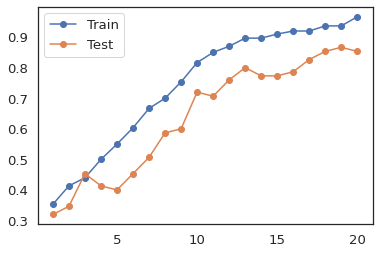

In [54]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

X_t, X_v, y_t, y_v = train_test_split(sub_2_dct, markers_sub_2_data_1, test_size=0.2)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 model.fit(X_t, y_t)
 # evaluate on the train dataset
 train_yhat = model.predict(X_t)
 train_acc = accuracy_score(y_t, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 validation_yhat = model.predict(X_v)
 validation_acc = accuracy_score(y_v, validation_yhat)
 test_scores.append(validation_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, validation_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

# CSP from mne

In [55]:
!pip install mne

from mne.decoding import CSP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
#sub_1_data --- (1500,250,8) ---> (samples, sample freq, channels)
sub_data = np.concatenate((epoched_sub_1_data_1,epoched_sub_2_data_1), axis=0)

In [57]:
sub_markers = np.concatenate((markers_sub_1_data_1, markers_sub_2_data_1), axis=0)

In [58]:
sub_data.shape

(750, 250, 8)

In [59]:
sub_markers.shape

(750,)

In [60]:
type(sub_data)

numpy.ndarray

In [ ]:
p = sub_data.astype(float)
#sub_1_markers.shape

#need to transpose p from ((750, 250, 8)) to this ((750, 8, 250))

In [ ]:
m=p.transpose((0,2,1))
m.shape

(750, 8, 250)

In [ ]:
csp = CSP(n_components=8, reg=None, log=True, norm_trace=False)
sub_csp_features = csp.fit_transform(m, sub_markers)

Computing rank from data with rank=None
    Using tolerance 9.6e+05 (2.2e-16 eps * 8 dim * 5.4e+20  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.6e+05 (2.2e-16 eps * 8 dim * 5.4e+20  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.6e+05 (2.2e-16 eps * 8 dim * 5.4e+20  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.


In [ ]:
sub_csp_features.shape

(750, 8)

# PCA(principle component analysis)

In [ ]:
sub_features = np.concatenate((sub_1_features,sub_2_features), axis=0)

In [ ]:
sub_markers.shape

(750,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
sub_PCA_features = sc.fit_transform(sub_features)

In [ ]:
sub_PCA_features

array([[-1.12304362, -1.11183951, -1.10317929, ...,  0.03416722,
        -0.02014785, -0.82905406],
       [-1.12270732, -1.11166493, -1.10301189, ...,  0.06271758,
        -0.04085074, -0.59293542],
       [-1.12258449, -1.11166647, -1.10301457, ...,  0.10151845,
        -0.04949618, -0.60531763],
       ...,
       [ 1.0148495 ,  1.01417692,  1.01116963, ..., -0.27120733,
         1.06804309, -0.15870395],
       [ 1.01498937,  1.01431113,  1.01127643, ..., -0.18983085,
         1.07522607,  1.06287677],
       [ 1.01502741,  1.01434678,  1.01130615, ...,  0.01333516,
         1.06894322,  0.09026049]])

In [ ]:
#np.nan_to_num(sub_PCA_features, nan=1,copy = False)

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
sub_PCA_features = pca.fit_transform(sub_PCA_features)

explained_variance = pca.explained_variance_ratio_

# accuracy on PCA features, mne_CSP features, DCT features, scratch_CSP_features

In [ ]:
train_test(sub_PCA_features, sub_markers)

[[ 0 67 15]
 [ 0 60 10]
 [ 0 64  9]]
Linear SVM Accuracy: 30.666666666666664%
5 fold cross validation scores=  [0.32       0.26       0.23333333 0.22       0.24666667]
average_5_fold=  0.256
max_5_fold=  0.32

Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.31      0.86      0.46        70
           2       0.26      0.12      0.17        73

    accuracy                           0.31       225
   macro avg       0.19      0.33      0.21       225
weighted avg       0.18      0.31      0.20       225

[[ 0 75  7]
 [ 0 65  5]
 [ 0 66  7]]
RBF SVM Accuracy: 32.0%
5 fold cross validation scores=  [0.32666667 0.27333333 0.23333333 0.26       0.22666667]
average_5_fold=  0.26399999999999996
max_5_fold=  0.32666666666666666

Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.32     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

[[26 21 35]
 [22 28 20]
 [22 25 26]]
RF Accuracy: 35.55555555555556%
5 fold cross validation scores=  [0.39333333 0.30666667 0.38       0.30666667 0.34666667]
average_5_fold=  0.3466666666666667
max_5_fold=  0.3933333333333333

Classification Report : 
              precision    recall  f1-score   support

           0       0.37      0.32      0.34        82
           1       0.38      0.40      0.39        70
           2       0.32      0.36      0.34        73

    accuracy                           0.36       225
   macro avg       0.36      0.36      0.36       225
weighted avg       0.36      0.36      0.36       225

[[ 0 67 15]
 [ 0 58 12]
 [ 0 62 11]]
LDA Accuracy: 30.666666666666664%
5 fold cross validation scores=  [0.32666667 0.24666667 0.22666667 0.23333333 0.26      ]
average_5_fold=  0.2586666666666667
max_5_fold=  0.32666666666666666

Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[31 28 23]
 [14 38 18]
 [24 29 20]]
AdaBoost Accuracy: 39.55555555555556%
5 fold cross validation scores=  [0.35333333 0.29333333 0.33333333 0.3        0.27333333]
average_5_fold=  0.31066666666666665
max_5_fold=  0.35333333333333333

Classification Report : 
              precision    recall  f1-score   support

           0       0.45      0.38      0.41        82
           1       0.40      0.54      0.46        70
           2       0.33      0.27      0.30        73

    accuracy                           0.40       225
   macro avg       0.39      0.40      0.39       225
weighted avg       0.39      0.40      0.39       225



In [ ]:
train_test(sub_csp_features, sub_markers)  #CSP using mne

[[26 39 17]
 [18 30 22]
 [15 28 30]]
Linear SVM Accuracy: 38.22222222222222%
5 fold cross validation scores=  [0.39333333 0.34       0.38666667 0.32       0.34      ]
average_5_fold=  0.35600000000000004
max_5_fold=  0.3933333333333333

Classification Report : 
              precision    recall  f1-score   support

           0       0.44      0.32      0.37        82
           1       0.31      0.43      0.36        70
           2       0.43      0.41      0.42        73

    accuracy                           0.38       225
   macro avg       0.39      0.39      0.38       225
weighted avg       0.40      0.38      0.38       225

[[18 37 27]
 [ 8 25 37]
 [ 6 25 42]]
RBF SVM Accuracy: 37.77777777777778%
5 fold cross validation scores=  [0.44       0.32       0.37333333 0.30666667 0.39333333]
average_5_fold=  0.36666666666666664
max_5_fold=  0.44

Classification Report : 
              precision    recall  f1-score   support

           0       0.56      0.22      0.32        82
   